# General Relativity - Tensor Calculator 
## Compute Reimann Tensors, Ricci Tensors, Christoffel Symbols, and the Ricci Scalar
### A simple easy-to-use Jupyter Notebook to help compute Christoffel symbols, the Reimann and Ricci Tensors, and the Ricci Scalar using SymPy with a given spacetime metric in 3 + 1 dimensions

By: Emaad Paracha

## Instructions:

The first two sections (Sections 0 and 1) of this notebook are "configuration" modules, while the last section (Section 2) is the "computation" module.<br/>

Section 0 imports the dependencies. <br/>

Section 1 is where all the functions are defined that compute the matrices for Christoffel symbols, and the Reimann and Ricci tensors, along with functions that would give individual values given specific indices. <b> <i> Normally you do not need to edit this section unless you want to play around with the code. I have commented some parts for ease of understanding. </i> </b> <br/>

Section 2 is the computation section, this is where you edit and input your metric, the symbols (variables) that your metric depends on (in order), and the initial orientation of your metric (whether you have $g^{\mu \nu}$ or $g_{\mu \nu}$).


## 0. Importing Dependencies

In [1]:
from sympy import *
from sympy.matrices import Matrix, zeros
from sympy import symbols
from sympy import Function, Symbol, Derivative
from IPython.display import display, Latex
init_printing(use_unicode=True)

## 1. Defining Functions

In [2]:
orientationError = 'ERROR: Please enter either "down" or "up" for the orientation of your metric'
indexError = 'ERROR: Please ensure your index values are integers between 0 and 3'

#Function to compute all Christoffel symbols
def ChristoffelSymbols(metricpack):
    
    g, sym, orientation = metricpack
    
    if (orientation != "down" and orientation != "up"):
        #Ensuring the correct orientation values are inputted
        print(orientationError)
    
    else:
        #Having the right metric components corresponding to the upstairs or downstairs metric
        if (orientation == "down"):
            gdndn = g
            gupup = gdndn.inv()
        else:
            gupup = g
            gdndn = gupup.inv()

        #Creating matrix for variables
        dava = Matrix(sym)

        #Creating empty Gamma matrix
        Gamma = Matrix([[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                              [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                              [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                              [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]])
        #Compute Christoffels
        for s in range(4):
            for m in range(4):
                for n in range(4):
                    for l in range(4):
                        Gamma[(m,n)][l] += ((1/2)*gupup[(m,s)])*((diff(gdndn[(s,l)],dava[n])) 
                                              + (diff(gdndn[(n,s)],dava[l])) 
                                              - (diff(gdndn[(n,l)],dava[s])))
        return simplify(Gamma)
    

#If we just need a specific Christoffel symbol
def GiveChristoffel(mu,nu,lamb,metricpack):
    
    g, sym, orientation = metricpack
    
    if (orientation != "down" and orientation != "up"):
        #Ensuring the correct orientation values are inputted
        print(orientationError)
    else:
        if (isinstance(mu, int) and isinstance(nu, int) and isinstance(lamb, int) and mu < 4 and mu >=0 and nu < 4 and nu >=0 and lamb < 4 and lamb >=0):
            chris = ChristoffelSymbols(metricpack)
            return chris[(mu,nu)][lamb]
        else:
            print(indexError)
    

#Computing all Reimann Tensors
def ReimannTensor(metricpack):
    
    g, sym, orientation = metricpack
    
    if (orientation != "down" and orientation != "up"):
        #Ensuring the correct orientation values are inputted
        print(orientationError)
    
    else:
        #Christoffels
        Gamma = ChristoffelSymbols(metricpack)

        #Creating matrix for variables
        dava = Matrix(sym)

        #Empty Reimann Matrix
        Reimann = Matrix([[[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]],
                           [[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]],
                           [[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]],
                           [[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
                            [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]]])

        #Computing the Reimanns
        for p in range(4):
            for s in range(4):
                for m in range(4):
                    for n in range(4):
                        Reimann[(p,s)][m][n] = (diff(Gamma[(p,s)][n],dava[m]) - diff(Gamma[(p,s)][m],dava[n]))
        l = 0
        p = 0
        s = 0
        m = 0
        n = 0

        for l in range(4):
            for p in range(4):
                for s in range(4):
                    for m in range(4):
                        for n in range(4):
                            Reimann[(p,s)][m][n] += (Gamma[(l,s)][n]*Gamma[(p,l)][m] - Gamma[(l,s)][m]*Gamma[(p,l)][n])

        return simplify(Reimann)
    

#If we just need a specific Reimann tensor
def GiveReimann(pho,sigma,mu,nu,metricpack):
    
    g, sym, orientation = metricpack
    
    if (orientation != "down" and orientation != "up"):
        #Ensuring the correct orientation values are inputted
        print(orientationError)
        
    else:
        if (isinstance(mu, int) and isinstance(nu, int) and isinstance(pho, int) and isinstance(sigma, int) and mu < 4 and mu >=0 and nu < 4 and nu >=0 and sigma < 4 and sigma >=0 and pho < 4 and pho >= 0):
            rem = ReimannTensor(metricpack)
            return rem[(pho,sigma)][mu][nu]
        else:
            print(indexError)
    

#Compute Ricci Tensor
def RicciTensor(metricpack):
    
    g, sym, orientation = metricpack
    
    if (orientation != "down" and orientation != "up"):
        #Ensuring the correct orientation values are inputted
        print(orientationError)
        
    else:
        remm = ReimannTensor(metricpack)
        
        Ricci = Matrix([[0,0,0,0],[0,0,0,0],
                        [0,0,0,0],[0,0,0,0]])
        
        for x in range(4):
            for y in range(4):
                for z in range(4):
                    Ricci[y,z] += remm[x,y][z][x]
                    
        return simplify(Ricci)

#If we just need a specific Ricci
def GiveRicci(mu,nu,metricpack):
    
    g, sym, orientation = metricpack
    
    if (orientation != "down" and orientation != "up"):
        #Ensuring the correct orientation values are inputted
        print(orientationError)
    
    else:
        ricci = RicciTensor(metricpack)
        return simplify(ricci[mu,nu])

#To compute Ricci Scalar
def RicciScalar(metricpack):
    
    g, sym, orientation = metricpack
    
    if (orientation != "down" and orientation != "up"):
        #Ensuring the correct orientation values are inputted
        print(orientationError)
        
    else:
        #Having the right metric components corresponding to the upstairs or downstairs metric
        if (orientation == "down"):
            gdndn = g
            gupup = gdndn.inv()
        else:
            gupup = g
            
        ricciscalare = 0
        
        ricciten = RicciTensor(metricpack)
        
        for i in range(4):
            ricciscalare += gupup[i,i]*ricciten[i,i]
            
        return simplify(ricciscalare)

## 2. Computation

<b>Instructions:</b> This is the section where you input your metric, the symbols (variables) that your metric depends on (in order), and the initial orientation of your metric (whether you have $g^{\mu \nu}$ or $g_{\mu \nu}$)

This example is for a metric with the following line element:
$$ ds^{2} = dt^{2} - t^{2}dr^{2} - t^{2}r^{2}d\theta^{2} - t^{2}r^{2}sin^{2}\theta d\phi^{2} $$

For ease of computations, I have assigned the following symbols to the variables the metric depends on:
$$ t = t $$
$$ r = r $$
$$ h = \theta $$
$$ p = \phi $$

These symbols are accordingly edited in the two lines commented with "Edit symbols here"

Next, enter the metric tensor in a matrix, labelled $\texttt{gtensor}$ below, of the form:

$$ \begin{bmatrix}
g_{00} & g_{01} & g_{02} & g_{03} \\
g_{10} & g_{11} & g_{12} & g_{13} \\
g_{20} & g_{21} & g_{22} & g_{23} \\
g_{30} & g_{31} & g_{32} & g_{33}
\end{bmatrix} $$

for $g_{\mu \nu}$ or similarly in the same format for $g^{\mu \nu}$.

Lastly, for the metric you entered, please denote whether the indices are "up" or "down", for example if your metric was $g_{\mu \nu}$, enter "down" for the orientation, and if your metric was $g^{\mu \nu}$, enter "up" for your orientation.

The code then packs these three items, the tensor, variables, and orientation, into a list, denoted by $\texttt{metric}$, and you have a list of functions at your disposal to compute either the Reimann or Ricci tensors, the Ricci Scalar, or Christoffel symbols.

To view your metric in a matrix form, call $\texttt{gtensor}$.

To view all possible Christoffel symbols in a 4x4x4 matrix, use $\texttt{ChristoffelSymbols(metric)}$.

To view a specific Christoffel symbol, i.e. $\Gamma^{3}_{23}$, use $\texttt{GiveChristoffel(3,2,3,metric)}$, where the first number, 3, is the upper index and 2 and 3 are the two lower indices in order.

To view the Reimann tensor in a 4x4x4x4 matrix, use $\texttt{ReimannTensor(metric)}$.

To view a specific component of the Reimann tensor, i.e. $R^{1}_{313}$, use $\texttt{GiveReimann(1,3,1,3,metric)}$, where the first number, 1, is the upper index and 3, 1, and 3 are the three lower indices in order.

To view the Ricci tensor in a 4x4 matrix, use $\texttt{RicciTensor(metric)}$.

To view a specific component of the Ricci tensor, i.e. $R_{33}$, use $\texttt{GiveRicci(3,3,metric)}$, where the numbers correspond to the two lower indices in order.

Lastly, to compute the Ricci scalar for the metric, simply use $\texttt{RicciScalar(metric)}$ to get the Ricci scalar.

All examples have been computed below.

In [3]:
t, r, h, p = symbols('t r h p') #Edit symbols here
variables = [t,r,h,p] #Edit symbols here

gtensor = Matrix([[1,0,0,0], #Corresponding to g00, g01, g02, g03
               [0,-t**2,0,0], #Corresponding to g10, g11, g12, g13
               [0,0,(-t**2)*r**2,0], #Corresponding to g20, g21, g22, g23
               [0,0,0,(-t**2)*(r**2)*(sin(h)**2)]]) #Corresponding to g30, g31, g32, g33

orientation = "down" #Orientation of the gtensor, whether it is g_mu_nu ("down") or g^mu^nu ("up")

metric = [gtensor,variables,orientation] #List of the gtensor, variables and orientation to be used

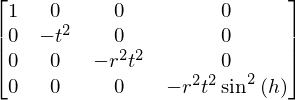

In [4]:
#Display the metric tensor:
gtensor

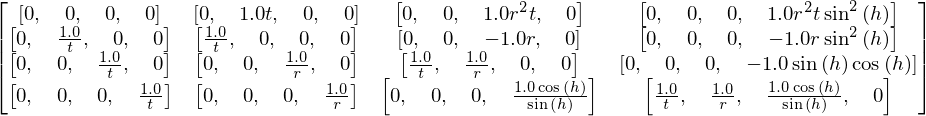

In [5]:
#Display a matrix of all possible Christoffel Symbols:
ChristoffelSymbols(metric)

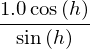

In [6]:
#Compute an example Christoffel, here we are computing Γ^(3)_(2,3)
GiveChristoffel(3,2,3,metric)

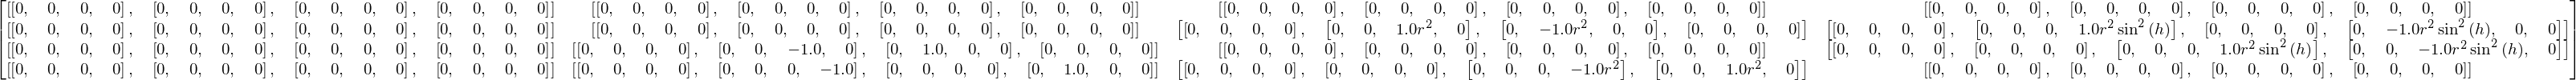

In [7]:
#Display the Reimann Tensor:
ReimannTensor(metric)

In [8]:
#Compute a specific Reimann, here we are computing R^(1)_(3,1,3)
GiveReimann(1,3,1,3,metric)

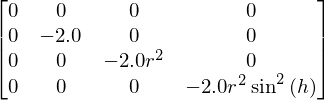

In [9]:
#Display the Ricci Tensor:
RicciTensor(metric)

In [10]:
#Compute a specific Ricci, here we are computing R_(3,3)
GiveRicci(3,3,metric)

In [11]:
#Display the Ricci Scalar:
RicciScalar(metric)